# Demo: Simulating Stock Prices with the Cox-Ross-Rubinstein Model

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
import sys


# this makes sure the images don't come out looking muddy on 
# retina displays (which your computer probably uses)
# Update 07/18/22: got retina working with updates thanks to 
# https://stackoverflow.com/questions/54312924/what-is-matplotlibs-retina-display-mode
%matplotlib inline
%config InlineBackend.figure_format='retina'

To simulate CRR, we need to input the up-probability $p$, the up-jump factor $u$, the initial stock price $S_0$, and the number of periods $T$ for which we wish to simulate. 

In [2]:
def simulate_price_process(p, u, S0, T):
    
    # initialize output S_0, S_1,... S_T
    S = np.zeros(int(T)+1, dtype=float)
    S[0] = S0
    
    # simulate T Bernoulli trials, =1 for each up-jump and =0 for each down=jump
    np.random.seed(32) # OPTIONAL fix the seed so results from slides are reproducible
    outcomes = np.random.binomial(1, p, int(T)) # note: this is an array of 1's and 0's
    
    cs = np.cumsum(outcomes) # = number of heads observed so far in experiments
    a = u**cs # note: cumsum(outcomes) gives number of upjumps
    b = d**(np.cumsum(np.ones_like(outcomes))-cs) # note: cumsum(1-outcomes) gives number of downjumps
    
    # the price process is then easily found from the above info: 
    S[1:] = S0*a*b
    
    return S 

Now we actually specify the particular model parameters we want to use. For this demonstration, we'll just pull parameters out of thin air: I don't yet want to talk about how to estimate model parameters from data (but stay tuned!). 

In [3]:
# choose your number of periods
T = 20

# Initial stock price
S0 = 2

# fix jump factors and probabilities 
u = 4./3. # up jump
d = 1./u # down jump

p = 2./3.
q = 1.-p

Now, we plot one possible evolution of the stock price. Note: you will have to run this code box twice to get the fonts looking nice. 

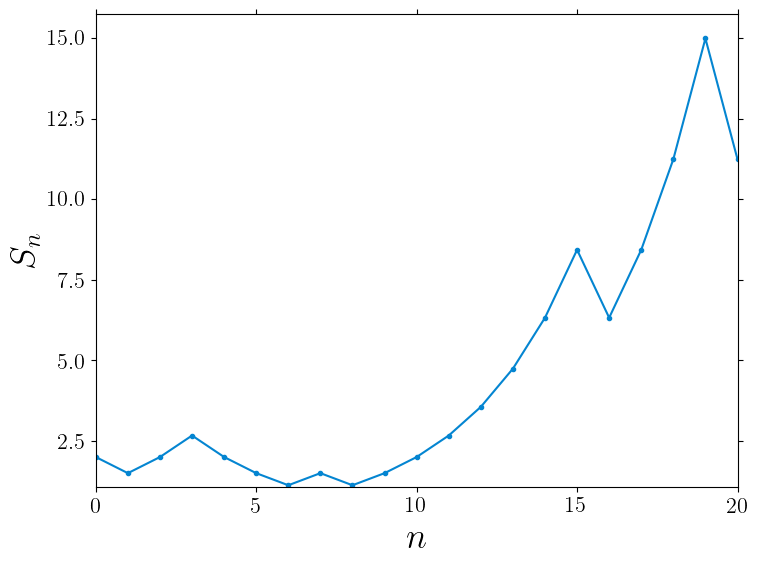

In [7]:
# initialize figure 
fig, ax =plt.subplots()
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

t = np.arange(0,T+1)
S = simulate_price_process(p, u, S0, T)

plt.plot(t, S, '.-', color='xkcd:cerulean') 

plt.xlabel(r"$n$", fontsize=26, color = 'k')
plt.ylabel(r"$S_{n}$", fontsize=26, color='k')

plt.tick_params(axis='x', which='both', top='off', color = 'k')
plt.xticks(fontsize=16, rotation=0, color = 'k')
plt.tick_params(axis='y', which='both', right='off', color = 'k')
plt.yticks(fontsize=16, rotation=0, color = 'k')
ax.locator_params(axis='y', nbins=6)
ax.locator_params(axis='x', nbins=4)

plt.xlim([0.0, T])
plt.ylim([0.95*np.amin(S), 1.05*np.amax(S)])

plt.tight_layout()

fig.set_size_inches(8, 6)  
        
#figname = 'crr_simulation=%.2f' % (T) + '.png'
#plt.savefig(figname, dpi=600)
    
plt.show()

Finally, since I don't have a better place to put it right now, I'm sticking the code used to make the Euro call payoff curve here. 

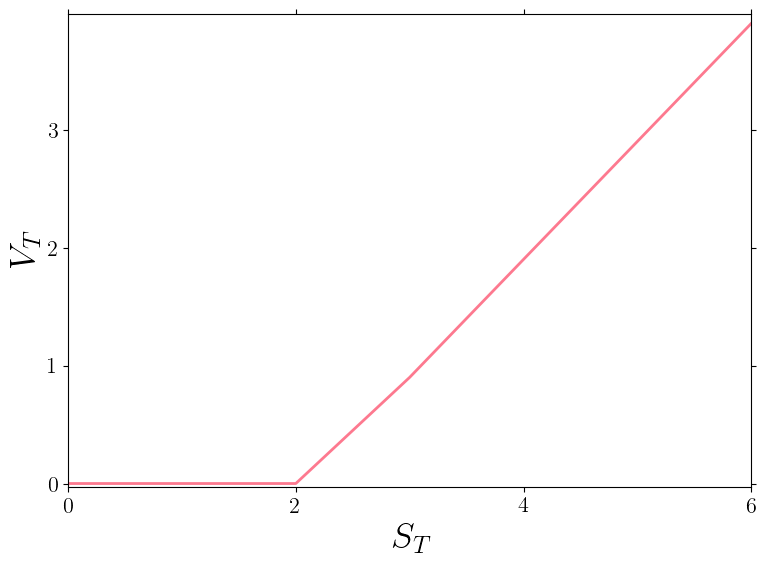

In [8]:
# initialize figure 
fig, ax =plt.subplots()
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

K = 2.10 

ST = np.arange(0, 7)
VT = np.zeros(7)
for k in ST:
    
    VT[k] = max(0,ST[k]-K) 

plt.plot(ST, VT, '-', color='xkcd:carnation', linewidth=2)

plt.xlabel(r"$S_T$", fontsize=26, color = 'k')
plt.ylabel(r"$V_T$", fontsize=26, color='k')

plt.tick_params(axis='x', which='both', top='off', color = 'k')
plt.xticks(fontsize=16, rotation=0, color = 'k')
plt.tick_params(axis='y', which='both', right='off', color = 'k')
plt.yticks(fontsize=16, rotation=0, color = 'k')
ax.locator_params(axis='y', nbins=6)
ax.locator_params(axis='x', nbins=4)

plt.xlim([0., 6.])
plt.ylim([-0.03, 1.02*np.amax(VT)])

plt.tight_layout()

fig.set_size_inches(8, 6)  
        
#figname = 'euro_call_payoff.png'
#plt.savefig(figname, dpi=600)
    
plt.show()

For more on option pricing with Cox-Ross-Rubinstein, see for example my repo here: https://github.com/ageorgemorgan/bim . The code here is a real fixer-upper, so be warned! 